# Course Name: **AI Mastery Bootcamp: AI Algorithms, DeepSeek AI, AI Agents**

# Section 9: Week 9: **Neural Networks and Deep Learning Fundamentals**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
# Load the dataset
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train= X_train.astype('float32') / 255.0
X_test= X_test.astype('float32') / 255.0

# One-Hot Encoding Target labels
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, {y_test.shape}")

# Define the baseline model

model= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Display the model summary
model.summary()

# Train the baseline model
history= model.fit(
    X_train, y_train,
    validation_split= 0.2,
    epochs= 10,
    batch_size= 64,
    verbose= 1
)

# Evaluate the baseline model
loss, accuracy= model.evaluate(X_test, y_test, verbose= 0)
print(f"Baseline Model Test Accuracy: {accuracy:.4f}")



Training Data Shape: (50000, 32, 32, 3), (50000, 10)
Testing Data Shape: (10000, 32, 32, 3), (10000, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2973 - loss: 1.8920 - val_accuracy: 0.4905 - val_loss: 1.4368
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5007 - loss: 1.3985 - val_accuracy: 0.5834 - val_loss: 1.1837
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5603 - loss: 1.2438 - val_accuracy: 0.6265 - val_loss: 1.0801
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5992 - loss: 1.1373 - val_accuracy: 0.6310 - val_loss: 1.0486
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6213 - loss: 1.0704 - val_accuracy: 0.6452 - val_loss: 1.0120
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6517 - loss: 1.0022 - val_accuracy: 0.6573 - val_loss: 0.9923
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6600 - loss: 0.9711 - val_accuracy: 0.6638 - val_loss: 0.9668
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6713 - loss: 0.9369 - val_accuracy: 0.

In [7]:
# Define the improved model

improved_model= Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the improved model with a learning rate scheduler
optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001)
improved_model.compile(optimizer= optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Display the model summary
improved_model.summary()

# Train the baseline model
improved_history= improved_model.fit(
    X_train, y_train,
    validation_split= 0.2,
    epochs= 20,
    batch_size= 64,
    verbose= 1
)

# Evaluate the baseline model
improved_loss, improved_accuracy= improved_model.evaluate(X_test, y_test, verbose= 0)
print(f"Improved Model Test Accuracy: {improved_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,031,818 (3.94 MB)

 Trainable params: 1,031,818 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3153 - loss: 1.8410 - val_accuracy: 0.5294 - val_loss: 1.3187
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5136 - loss: 1.3596 - val_accuracy: 0.5758 - val_loss: 1.1879
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5831 - loss: 1.1783 - val_accuracy: 0.6257 - val_loss: 1.0629
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6290 - loss: 1.0497 - val_accuracy: 0.6493 - val_loss: 0.9971
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6664 - loss: 0.9435 - val_accuracy: 0.6720 - val_loss: 0.9584
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6911 - loss: 0.8770 - val_accuracy: 0.6867 - val_loss: 0.9080
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7190 - loss: 0.7923 - val_accuracy: 0.6998 - val_loss: 0.8737
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7411 - loss: 0.7293 - val_accuracy: 0.

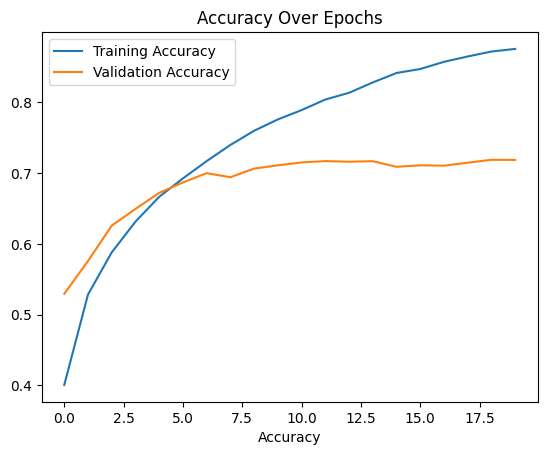

In [8]:
# Plot training and validation accuracy
plt.plot(improved_history.history['accuracy'], label= "Training Accuracy")
plt.plot(improved_history.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

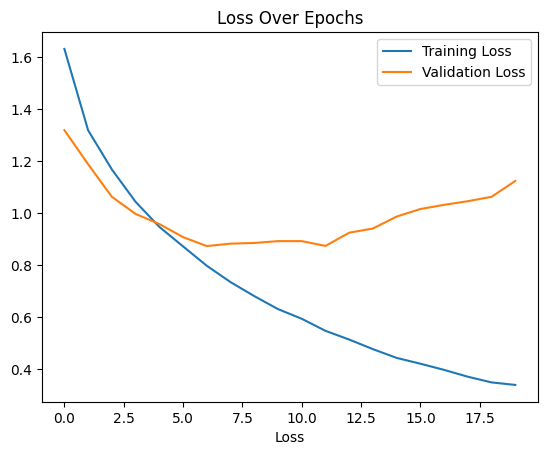

In [9]:
# Plot training and validation loss
plt.plot(improved_history.history['loss'], label= "Training Loss")
plt.plot(improved_history.history['val_loss'], label= "Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.xlabel("Loss")
plt.legend()
plt.show()